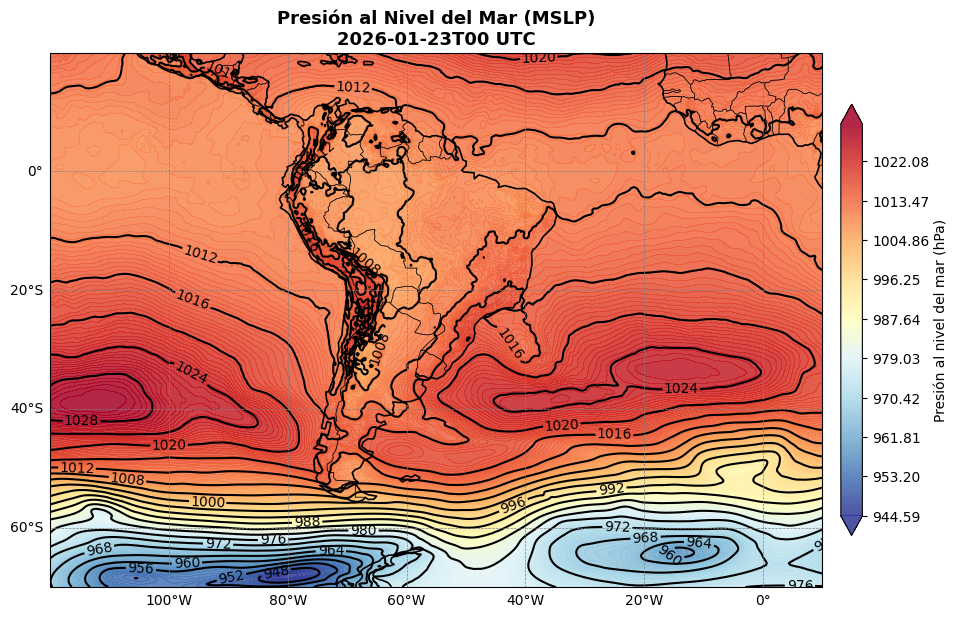

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

# -------------------------------
# 1. Cargar datos
# -------------------------------
dg = xr.open_dataset(r"C:\Users\ANALY AVALOS\Downloads\TRABAJO3-VIENTO\nivmar.nc")

# -------------------------------
# 2. Configuración MSLP
# -------------------------------
fecha_query = '2026-01-23T00:00:00'

# Seleccionar tiempo más cercano
ds = dg.sel(valid_time=fecha_query, method='nearest')

# Convertir a hPa
mslp_hpa = ds.msl / 100.0

# -------------------------------
# 3. Límites automáticos
# -------------------------------
p_min, p_max = float(mslp_hpa.min()), float(mslp_hpa.max())

# Sombreado suave (muchos niveles)
niveles_sombreado = np.linspace(p_min, p_max, 200)

# Isobaras estándar cada 4 hPa
intervalo = 4
niveles_isobaras = np.arange(np.floor(p_min/intervalo)*intervalo, p_max + intervalo, intervalo)

# -------------------------------
# 4. Punto cíclico
# -------------------------------
p_cyc, lon_cyc = add_cyclic_point(mslp_hpa.values, coord=ds.longitude)

# -------------------------------
# 5. Figura y mapa
# -------------------------------
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-120, 10, -70, 20], crs=ccrs.PlateCarree())

# -------------------------------
# CAPA 1: SOMBREADO SUAVE
# -------------------------------
im = ax.contourf(
    lon_cyc, ds.latitude, p_cyc,
    levels=niveles_sombreado,
    cmap="RdYlBu_r",
    extend='both',
    transform=ccrs.PlateCarree(),
    alpha=0.85
)

# -------------------------------
# CAPA 2: ISOBARAS NEGRAS
# -------------------------------
cs = ax.contour(
    lon_cyc, ds.latitude, p_cyc,
    levels=niveles_isobaras,
    colors="black",
    linewidths=1.5,
    transform=ccrs.PlateCarree(),
    zorder=2
)

ax.clabel(cs, fmt="%d", inline=True, fontsize=10, inline_spacing=5)

# -------------------------------
# Geografía
# -------------------------------
ax.add_feature(cfeature.COASTLINE, linewidth=1.2, edgecolor='black', zorder=5)
ax.add_feature(cfeature.BORDERS, linewidth=0.6, zorder=5)

# Grid
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = False
gl.right_labels = False

# -------------------------------
# Barra de color
# -------------------------------
plt.colorbar(im, label='Presión al nivel del mar (hPa)', pad=0.02, shrink=0.8)

# -------------------------------
# Título
# -------------------------------
fecha_real = np.datetime_as_string(ds.valid_time.values, unit='h')

ax.set_title(
    f"Presión al Nivel del Mar (MSLP)\n{fecha_real} UTC",
    fontweight='bold',
    fontsize=13
)

plt.show()
